# Documentation/Problem

Overview Document:
https://docs.google.com/document/d/1iCxfrZk6sItTWWmypH4ljDYWtyF3GRQ7Z1ejDXuf6Jo/edit?tab=t.0

Research Questions:

- Are sleeping habits related to suicidal thoughts?
- What's most highly correlated with suicidal thoughts?
- Does financial stress correlate with depression?
- Good binary values: Depression, suicidal thoughts.

Problem Statement: Our task is to find what factors contribute most to depression in students, like: sleeping habits, suicidal thoughts, stress, etc.

## Setup

All the imports for dataset analysis, preprocessing, and model building.

In [ ]:
# Normal imports
import sys
import pandas as pd
import numpy as np
# Preprocessing imports.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# Model training imports.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
# Sampling
from imblearn.over_sampling import SMOTE

Mounts to drive. Used so we can synchronize Google Drive directory data and not have to reimport the CSVs again.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Felipe's fancy way of registering the working directory into the collab notebook.

In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Course\ 2/Final\ Project/* /content/

Finally, read the desired CSV file.

In [ ]:
data = pd.read_csv("StressLevelDataset.csv")

# Data Preprocessing

## Doing our data cleaning:
1. Either turn columns 'Depression label' or 'Depression value' into a binary value (potentially turning it multi-class later on).
2. Drop the other Depression column, depending on what we use.
3. Drop columns unrelated to the Depression column.
4. Turn Num 7 into a numerical value.
5. Check for any numbers out of range, and null values.
6. Turn other categorical columns into numerical.

Ordinal Encoding:
- Order the column values and encode them from string into numerical. Encoding for obvious order.

One Hot Encoding:
- Encoding for those with no obvious order.

## Data Mapping

Below are some code blocks to help us map out information in our dataset. First thing to note, we are going to have to drop a variety of columns from the stress and anxiety table. We will use only their Value/Label as features if need-be.

Then for clarity, we will turn PHP (the questions for Depression) into their original question statements.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Takes a look at the head in order to get a general idea of the dataset.

In [ ]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


### Dropping Anxiety and Stress columns.

Drop these for the reasons stated above.

In [ ]:
"""columns_to_drop = ['PSS1', 'PSS2', 'PSS3', 'PSS4','PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10','GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'Anxiety Value', 'Stress Value', 'Depression Value']
data = data.drop(columns=columns_to_drop)"""

"columns_to_drop = ['PSS1', 'PSS2', 'PSS3', 'PSS4','PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10','GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'Anxiety Value', 'Stress Value', 'Depression Value']\ndata = data.drop(columns=columns_to_drop)"

We ended up dropping the value columns for Stress and Anxiety, instead opting to use their labels for their features.

**Important note**: We dropped Depression value as well because we opted to turn Depression Label into our target column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

### Renaming PHQ to Questions.

Now we rename the PHQ questions for the reasons stated above.

In [ ]:
"""data = data.rename(columns={'PHQ1':'In a semester, how often have you had little interest or pleasure in doing things?',
                        'PHQ2':'In a semester, how often have you been feeling down, depressed or hopeless?',
                        'PHQ3':'In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?',
                        'PHQ4':'In a semester, how often have you been feeling tired or having little energy?',
                        'PHQ5':'In a semester, how often have you had poor appetite or overeating?',
                        'PHQ6':'In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?',
                        'PHQ7':'In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?',
                        'PHQ8':"In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?",
                        'PHQ9':'In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?'})"""

'data = data.rename(columns={\'PHQ1\':\'In a semester, how often have you had little interest or pleasure in doing things?\',\n                        \'PHQ2\':\'In a semester, how often have you been feeling down, depressed or hopeless?\',\n                        \'PHQ3\':\'In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?\',\n                        \'PHQ4\':\'In a semester, how often have you been feeling tired or having little energy?\',\n                        \'PHQ5\':\'In a semester, how often have you had poor appetite or overeating?\',\n                        \'PHQ6\':\'In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?\',\n                        \'PHQ7\':\'In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?\',\n                        \'PHQ8\':"In a semester, how often

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

### Continued Data Mapping + Getting Categorical Columns

Not too many rows dropped from duplicates. Should be good to do an implace.

In [ ]:
print(f"Number of Rows after dropping duplicates: {len(data.drop_duplicates())}")
print(f"How many rows dropped: {len(data) - len(data.drop_duplicates())}")

Number of Rows after dropping duplicates: 1100
How many rows dropped: 0


No rows were dropped. Might need to check into that in-case zeros were counted as null values. But first, we need to do some data encoding.

In [ ]:
print(f"Number of Rows after dropping null values: {len(data.dropna())}")
print(f"How many rows dropped: {len(data) - len(data.dropna())}")

Number of Rows after dropping null values: 1100
How many rows dropped: 0


First of all, we need to get a list of all available categorical columns.

In [ ]:
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns.columns.to_list()

[]

Decent amount of categorical columns. But they all aren't going to be encoded the same way.

## Data Encoding

### Categorical Converison

In order to work with the data with an object type (String) for a model, we have to convert them into a numeric type.

Now we need to decide what encoding to do with each column.

Print out all the current unique values in each categorical column currently.

In [ ]:
for col in categorical_columns:
    print(col, data[col].unique())

Age, Academic_Year, Current_CGPA, Stress Label and Anxiety Label all have pretty defined orders of columns. Therefor, we should do ordinal encoding on those columns.

In [ ]:
"""ordinal_encoding_cols = categorical_columns.loc[:, ['Age', 'Academic_Year', 'Current_CGPA', 'Stress Label', 'Anxiety Label']].copy()
ordinal_encoding_cols.info()"""

"ordinal_encoding_cols = categorical_columns.loc[:, ['Age', 'Academic_Year', 'Current_CGPA', 'Stress Label', 'Anxiety Label']].copy()\nordinal_encoding_cols.info()"

Gender; University; Department; waiver_or_scholarship, however, don't have a clear defined order or are binary values that can be done with one hot encoding.

In [ ]:
"""one_hot_encoding_cols = categorical_columns.loc[:, ['Gender', 'University', 'Department', 'waiver_or_scholarship']].copy()
one_hot_encoding_cols.info()"""

"one_hot_encoding_cols = categorical_columns.loc[:, ['Gender', 'University', 'Department', 'waiver_or_scholarship']].copy()\none_hot_encoding_cols.info()"

All that's left is the Depression Label, which is our target column. This column is special in that we either need to turn it into a multi-class target value, or turn it into a binary value with a specified threshold.

We decided to put a multi-class as a stretch goal. So, binary value it is!

We'll do more with this later. Right now, we're going to change the encoding columns.

In [ ]:
"""target_column = categorical_columns['Depression Label'].copy()"""

"target_column = categorical_columns['Depression Label'].copy()"

### One-Hot Encoding

Was advised to use pd.get_dummies() instead of the sklearn OneHotEncoder. Other than that, they are both OHE, so we'll use One-Hot encoding for unordered values.

Let's take a look at the columns again.

In [ ]:
"""for col in one_hot_encoding_cols:
    print(col, one_hot_encoding_cols[col].unique())"""

'for col in one_hot_encoding_cols:\n    print(col, one_hot_encoding_cols[col].unique())'

Finally, with the get_dummies, iterate through each column and transform the data!

There are a lot of resulting columns, but I have confirmed that they are correct and used in the model.

In [ ]:
"""oh_encoded_df = pd.get_dummies(one_hot_encoding_cols)
oh_encoded_df"""

'oh_encoded_df = pd.get_dummies(one_hot_encoding_cols)\noh_encoded_df'

waiver_or_scholarship is a binary value, and as pd.get_dummies() gave us two column values for it, we are safe to drop one. We don't need both of them.

In [ ]:
"""oh_encoded_df = oh_encoded_df.drop('waiver_or_scholarship_No', axis=1)
oh_encoded_df.info()"""

"oh_encoded_df = oh_encoded_df.drop('waiver_or_scholarship_No', axis=1)\noh_encoded_df.info()"

Again, a lot of columns, but we can see if we need to trim them down or something later. Now we'll move onto Ordinal Encoding.

### Ordinal Encoding

Now, we'll do an ordinal encoding with sklearn OrdinalEncoder for the ordered column values.

First, we'll recheck the columns that need to be processed.

In [ ]:
"""for col in ordinal_encoding_cols:
    print(col, ordinal_encoding_cols[col].unique())"""

'for col in ordinal_encoding_cols:\n    print(col, ordinal_encoding_cols[col].unique())'

Looks good! Except values like 'Below 18' should be before '18-22'. 'Other' and 'First Year or Equivalent' should be at the opposite ends, but they are in the middle! Same with columns like Current_CGPA, and the Stress/Anxiety labels.

They should be like this so they're in a clear and concise order when parsed into a visualization/model.

In [ ]:
# We can create constant columns for this:
# These columns re-order the names, and are parsed correctly when using OrdinalEncoder.
"""AGE_COL = ['Below 18', '18-22', '23-26', '27-30', 'Above 30']
ACADEMIC_YEAR_COL = ['First Year or Equivalent', 'Second Year or Equivalent', 'Third Year or Equivalent',
  'Fourth Year or Equivalent', 'Other']
CURRENT_CGPA_COL = ['Below 2.50', '2.50 - 2.99', '3.00 - 3.39', '3.40 - 3.79', '3.80 - 4.00', 'Other']
STRESS_LABEL_COL = ['Low Stress', 'Moderate Stress', 'High Perceived Stress']
ANXIETY_LABEL_COL = ['Minimal Anxiety', 'Mild Anxiety', 'Moderate Anxiety', 'Severe Anxiety']"""

"AGE_COL = ['Below 18', '18-22', '23-26', '27-30', 'Above 30']\nACADEMIC_YEAR_COL = ['First Year or Equivalent', 'Second Year or Equivalent', 'Third Year or Equivalent',\n  'Fourth Year or Equivalent', 'Other']\nCURRENT_CGPA_COL = ['Below 2.50', '2.50 - 2.99', '3.00 - 3.39', '3.40 - 3.79', '3.80 - 4.00', 'Other']\nSTRESS_LABEL_COL = ['Low Stress', 'Moderate Stress', 'High Perceived Stress']\nANXIETY_LABEL_COL = ['Minimal Anxiety', 'Mild Anxiety', 'Moderate Anxiety', 'Severe Anxiety']"

These can now be used in the category parameter to identify the reordered columns.

They will be in double lists when added in categories because the OrdinalEncoder expects a two-dimension numpy array, like this for example.

In [ ]:
"""ordinal_encoding_cols[['Age']].to_numpy()"""

"ordinal_encoding_cols[['Age']].to_numpy()"

We make the Ordinal Encoder first, with all its categories.

In [ ]:
"""or_encoder = OrdinalEncoder(categories=[AGE_COL, ACADEMIC_YEAR_COL, CURRENT_CGPA_COL, STRESS_LABEL_COL, ANXIETY_LABEL_COL])"""

'or_encoder = OrdinalEncoder(categories=[AGE_COL, ACADEMIC_YEAR_COL, CURRENT_CGPA_COL, STRESS_LABEL_COL, ANXIETY_LABEL_COL])'

Then we apply a fit transform to it, casting the transform to an integer value. The columns parameter is so that the names are preserved.

In [ ]:
"""or_encoded_df = pd.DataFrame(or_encoder.fit_transform(ordinal_encoding_cols.to_numpy()).astype(int), columns=ordinal_encoding_cols.columns.tolist())
or_encoded_df.info()"""

'or_encoded_df = pd.DataFrame(or_encoder.fit_transform(ordinal_encoding_cols.to_numpy()).astype(int), columns=ordinal_encoding_cols.columns.tolist())\nor_encoded_df.info()'

Unique values for comparsion on how they converted. 0 indicates the first column of course.

In [ ]:
"""for col in or_encoded_df:
    print(col, or_encoded_df[col].unique())"""

'for col in or_encoded_df:\n    print(col, or_encoded_df[col].unique())'

Looks good, each column has its data converted into an integer. But now we need to make sure it IS correct. Let's look at the head of the regular ordinal columns.

In [ ]:
"""ordinal_encoding_cols"""

'ordinal_encoding_cols'

Now take a took at the head of the new dataframe.

In [ ]:
"""or_encoded_df"""

'or_encoded_df'

As we can see:
- 18-22 and 23-26 being 1 and 2 means that they are the correct indexes. As we moved 'Below 18' to the start, 0 is 'Below 18'.
- Academic year looks correct, Second and Third Year start at indexes 1 and 2.
- Current CGPA looks correct. Same situation as Age column.
- Stress Label/Anxiety Label also align with their appropriate keys.

Everything has been reordered nicely, and from their unique data columns, their actual 'order' has been preserved.

### Target Column

In [ ]:
target_column = data['depression']

Unique values for a more indepth view.

In [ ]:
target_column.unique()

array([11, 15, 14,  7, 21,  6, 22, 12, 27, 25,  8, 24,  3,  1,  0,  5, 26,
       20, 10,  9,  2, 16,  4, 13, 18, 23, 17, 19])

In order to make this a binary value, we need to combine columns. The question is what to combine, however.

These are the depression values from the PHQ9 Questionnaire:
- 1-4 Minimal depression
- 5-9 Mild depression
- 10-14 Moderate depression
- 15-19 Moderately severe depression
- 20-27 Severe depression

And with this dataset, there is also a 'No Depression' column with a value of 0.

This means we 'iterate' (or better yet, find a way to change values all at once with a function) through the target column, matching it to a solid binary value.

Our decided threshold for having depression is Moderate Depression. This is of course simplyfying how we solve our problem, but having "no" depression being the first three columns (0; 1-4; 5-9) will give a base for our binary value.

In [ ]:
# Making an exact copy just in-case.
target_col_df = target_column.copy()

In [ ]:
# Creating constants like before, so we are more explicit on what we're doing.
BINARY_DEPRESSION_FALSE = list(range(0, 10))
BINARY_DEPRESSION_TRUE = list(range(10, 28))
print(BINARY_DEPRESSION_FALSE, BINARY_DEPRESSION_TRUE)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [ ]:
# Potentially helpful, though i'd recommend finding a 'cleaner' way to do this if possible.
"""for i in range(len(target_col_df)):
    if target_col_df.loc[i] in BINARY_DEPRESSION_FALSE:
        target_col_df.loc[i] = False
    elif target_col_df.loc[i] in BINARY_DEPRESSION_TRUE:
        target_col_df.loc[i] = True"""

'for i in range(len(target_col_df)):\n    if target_col_df.loc[i] in BINARY_DEPRESSION_FALSE:\n        target_col_df.loc[i] = False\n    elif target_col_df.loc[i] in BINARY_DEPRESSION_TRUE:\n        target_col_df.loc[i] = True'

In [ ]:
# Same as above, but this time it uses loc for indexing and changing values.
# 0 equals False, 1 equals True
target_col_df.loc[target_col_df.isin(BINARY_DEPRESSION_FALSE)] = 0
target_col_df.loc[target_col_df.isin(BINARY_DEPRESSION_TRUE)] = 1

Compare target column before to the dataframe we have now.

In [ ]:
target_column[0:15]

,depression
0,11
1,15
2,14
3,15
4,7
5,21
6,6
7,22
8,12
9,27


In [ ]:
target_col_df[0:15]

,depression
0,1
1,1
2,1
3,1
4,0
5,1
6,0
7,1
8,1
9,1


'Severe Depression', 'Moderately Severe Depression', 'Moderate Depression' all have a value of True.

'No Depression', 'Minimal Depression', and 'Mild Depression' are all False.

In [ ]:
target_col_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1100 entries, 0 to 1099
Series name: depression
Non-Null Count  Dtype
--------------  -----
1100 non-null   int64
dtypes: int64(1)
memory usage: 8.7 KB


Target column has been finished!

Let's take a quick look at how many fall under this binary label.

In [ ]:
target_col_df.loc[target_col_df == True]

,depression
0,1
1,1
2,1
3,1
5,1
...,...
1090,1
1091,1
1095,1
1098,1


In [ ]:
target_col_df.loc[target_col_df == False]

,depression
4,0
6,0
12,0
14,0
16,0
...,...
1092,0
1093,0
1094,0
1096,0


## Combining Data

- First step: Drop original/replace original columns.
1.   Ordinal Columns: replace original columns.
2.   One-Hot Columns: drop original columns and find a way to insert them into the same position.
- Second Step: Replace Depression Label with the new Target Column, keeping the name but having it's values replaced with a binary value.

As Zanett pointed out, we can just do the one-hot encoding on the original dataframe and recreate the steps from earlier.

In [ ]:
"""data = pd.get_dummies(data, columns=one_hot_encoding_cols.columns.tolist())
data = data.drop('waiver_or_scholarship_No', axis=1)"""

"data = pd.get_dummies(data, columns=one_hot_encoding_cols.columns.tolist())\ndata = data.drop('waiver_or_scholarship_No', axis=1)"

In [ ]:
"""for col in or_encoded_df:
  data[col] = or_encoded_df[col]"""

'for col in or_encoded_df:\n  data[col] = or_encoded_df[col]'

In [ ]:
# pop removes column (Depression Label)
data[target_col_df.name] = target_col_df
target_col = data.pop(target_col_df.name)
# Then inserts at end
data.insert(len(data.columns), target_col.name, target_col)

In [ ]:
data[target_col_df.name][0:15]

,depression
0,1
1,1
2,1
3,1
4,0
5,1
6,0
7,1
8,1
9,1


In [ ]:
data

,anxiety_level,self_esteem,mental_health_history,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,depression
0,14,20,0,2,1,2,4,2,3,3,...,3,2,3,3,2,3,3,2,1,1
1,15,8,1,5,3,1,4,3,1,2,...,1,4,1,5,1,4,5,5,2,1
2,12,18,1,2,1,2,2,2,2,3,...,2,3,3,2,2,3,2,2,1,1
3,16,12,1,4,3,1,3,4,2,2,...,2,4,1,4,1,4,4,5,2,1
4,16,28,0,2,3,5,1,3,2,4,...,4,3,1,2,1,5,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,3,1,3,2,2,2,2,...,2,2,2,3,3,2,3,3,1,1
1096,9,12,0,0,3,0,0,0,1,3,...,0,1,1,1,1,3,4,3,2,0
1097,4,26,0,1,2,5,2,2,3,4,...,5,1,4,1,3,1,2,1,0,0
1098,21,0,1,5,3,1,4,3,1,1,...,2,5,1,4,1,4,4,4,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   headache                      1100 non-null   int64
 4   blood_pressure                1100 non-null   int64
 5   sleep_quality                 1100 non-null   int64
 6   breathing_problem             1100 non-null   int64
 7   noise_level                   1100 non-null   int64
 8   living_conditions             1100 non-null   int64
 9   safety                        1100 non-null   int64
 10  basic_needs                   1100 non-null   int64
 11  academic_performance          1100 non-null   int64
 12  study_load                    1100 non-null   int64
 13  teacher_student_relationship  110

# Data Visualizations

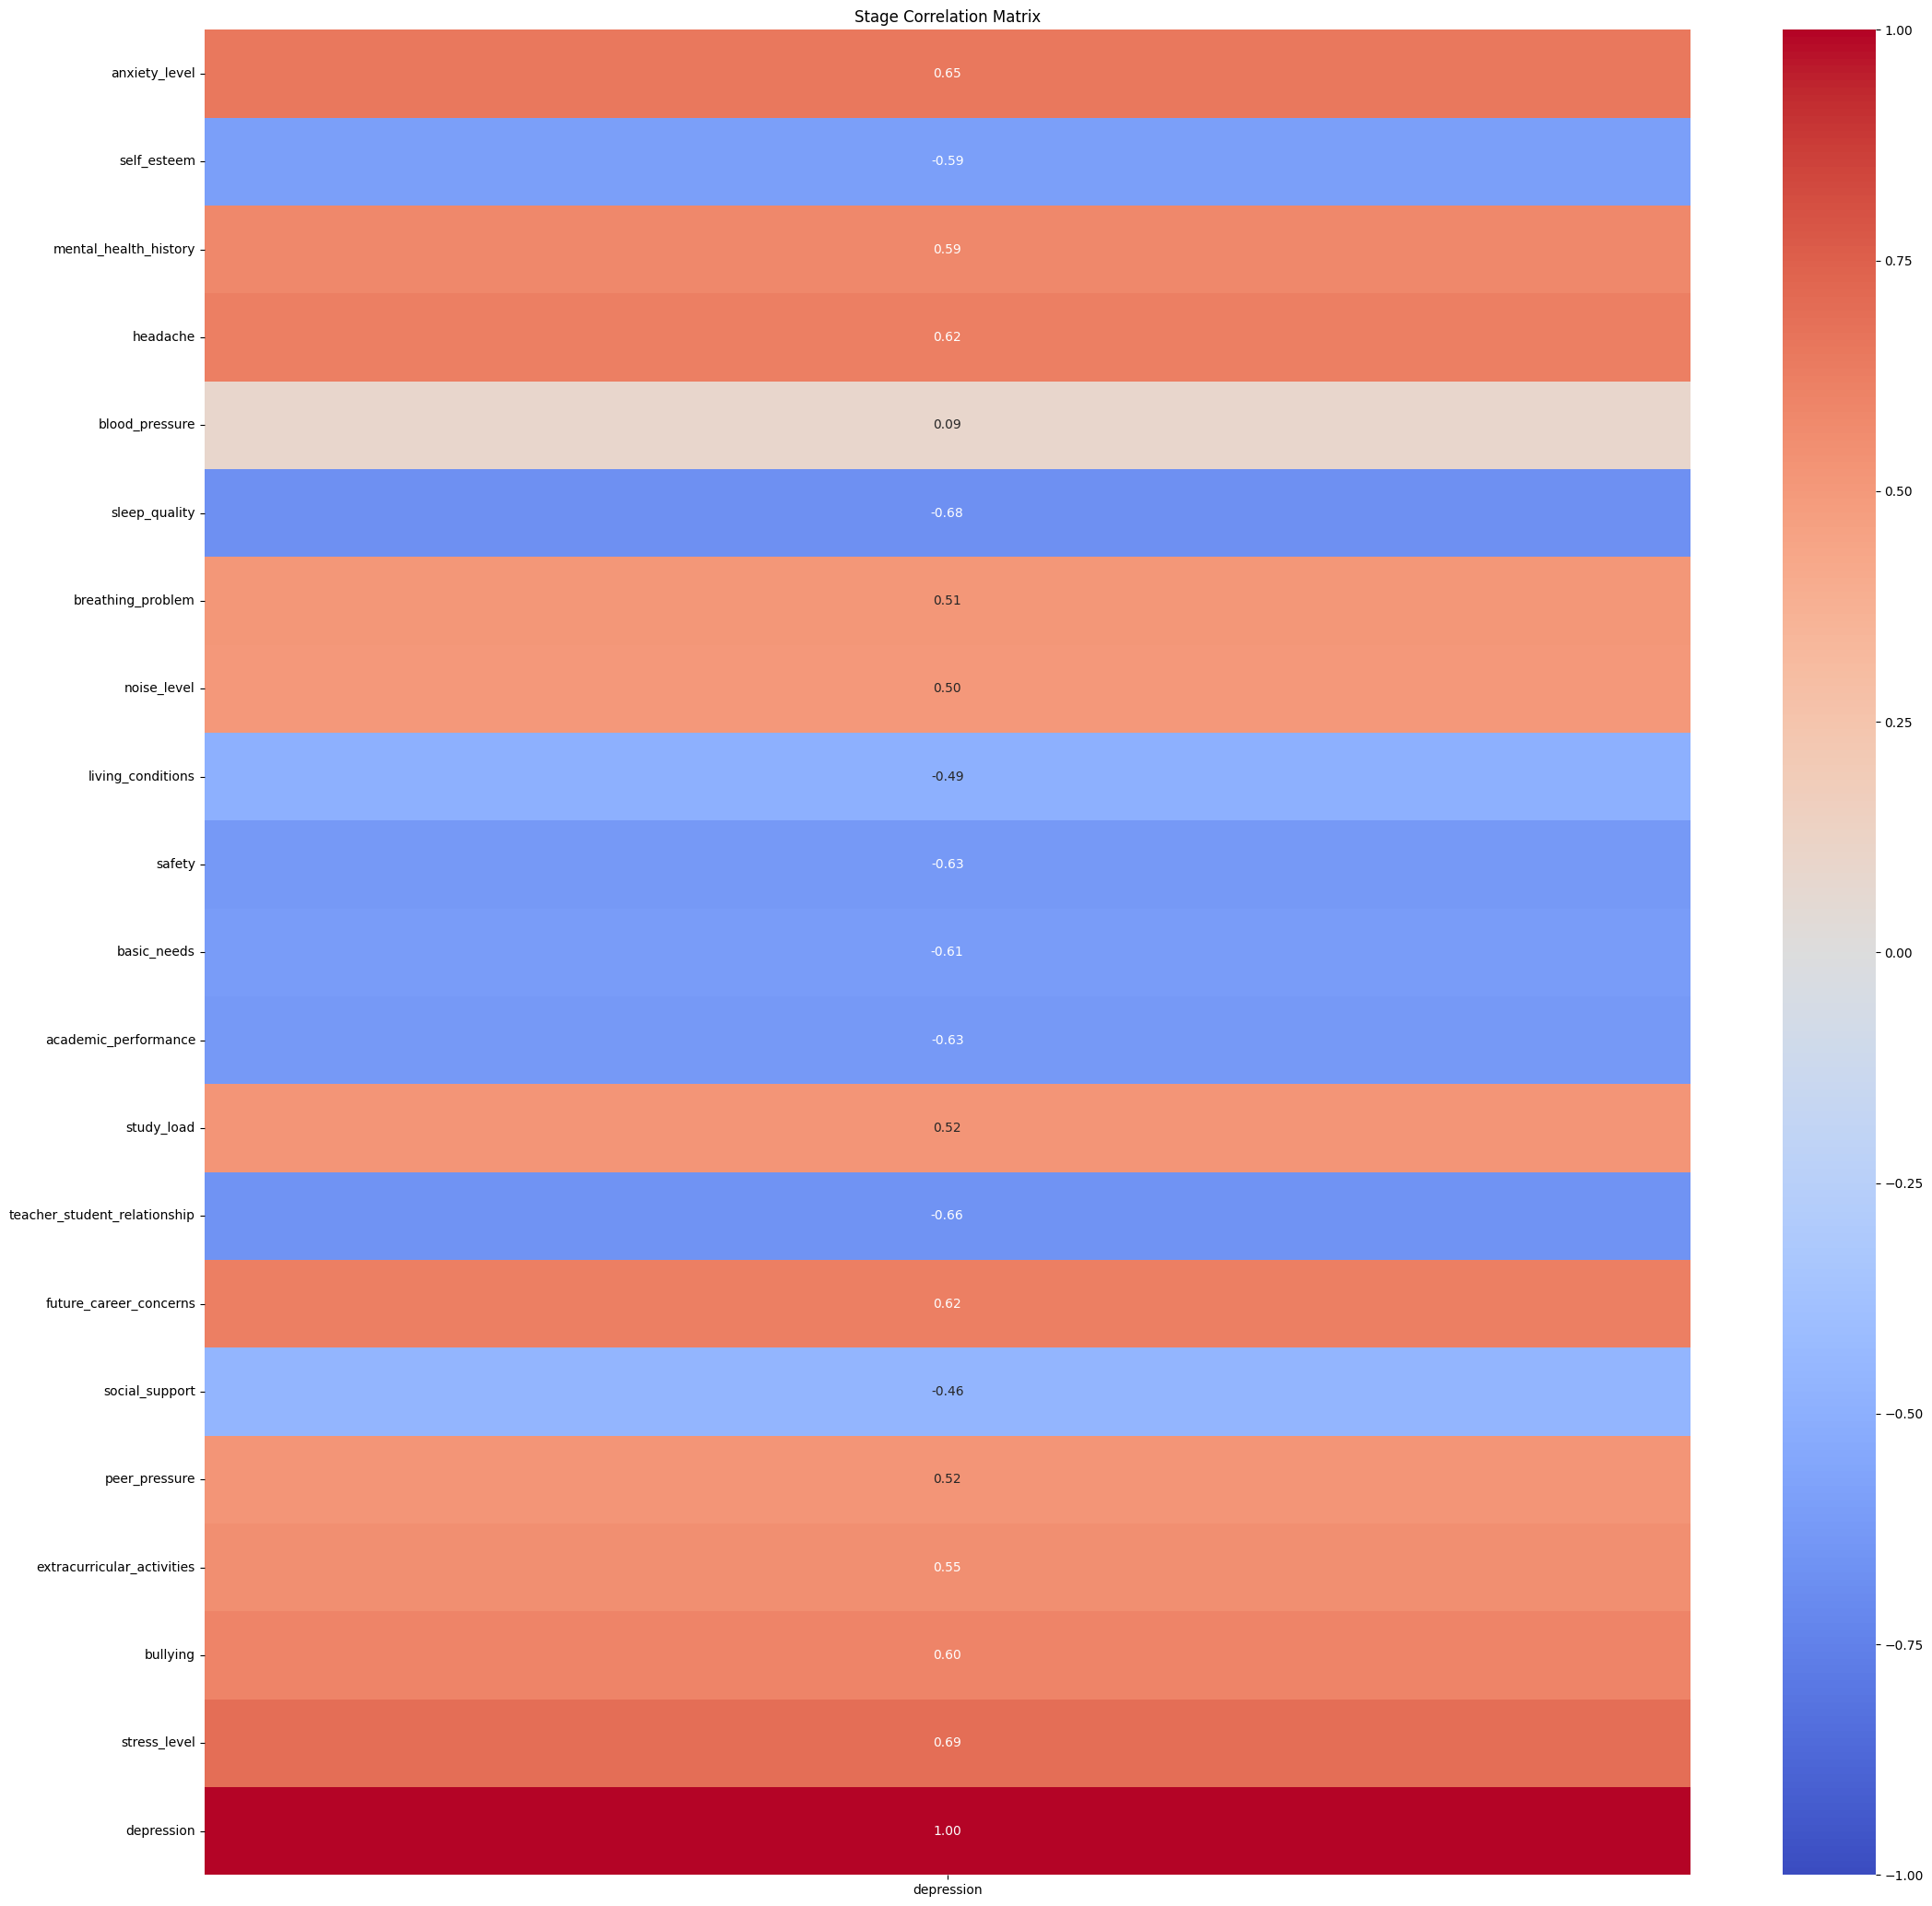

In [ ]:
corr_matrix = data.corr()[["depression"]]
plt.figure(figsize=(26, 26))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Stage Correlation Matrix")
plt.show()

Mostly Correlated - a lot of the PHQ and features indirectly contributing to depression.

MOST Correlated - "How often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down": It's only .01 the other mostly correlated features.

LEAST Correlated - "American International University Bangladesh": Although this is the least correlated, it's mostly neutral.

What we could do:
1. Test our models with every feature
2. Test our models with only correlated features
3. Test our models with neutral features.

In [ ]:
"""sns.displot(data["In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?"])

# Show the plot
plt.show()"""

'sns.displot(data["In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?"])\n\n# Show the plot\nplt.show()'

Shows distribution of most correlated feature. Most picked option 3.

# Models

## Logistic Regression

### Data Split

In [ ]:
X = data.drop(columns="depression")
y = data["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

print(f"Train acc: {round(accuracy_score(y_train, lr_y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, lr_y_test_pred), 3)}")

Train acc: 0.901
Test acc: 0.845


### Classification Report

In [ ]:
# Evaluate the model
print(classification_report(y_test, lr_y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        88
           1       0.85      0.90      0.88       132

    accuracy                           0.85       220
   macro avg       0.84      0.83      0.84       220
weighted avg       0.84      0.85      0.84       220



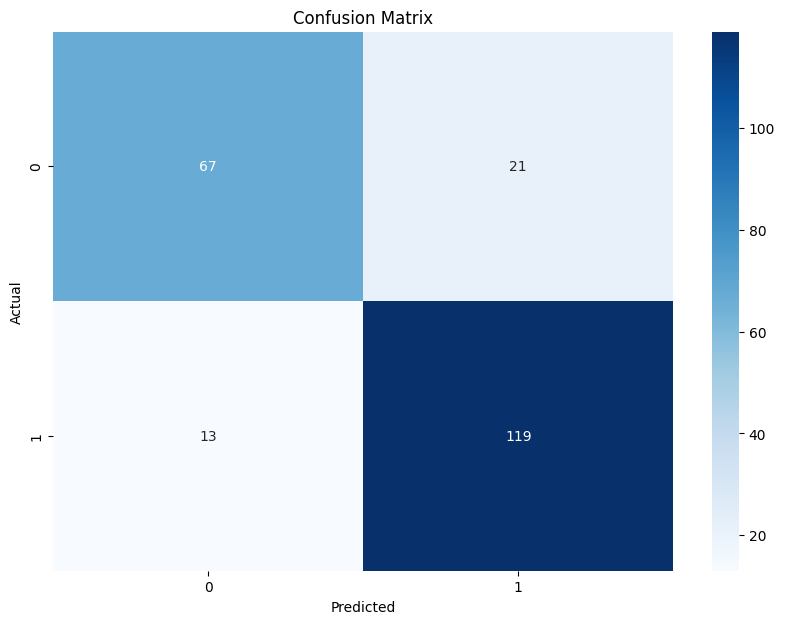

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

### Data Split

In [ ]:
X = data.drop(columns="depression")
y = data["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.8363636363636363


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9227272727272727
Test Accuracy: 0.8818181818181818


### Classification Report

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        88
           1       0.87      0.94      0.91       132

    accuracy                           0.88       220
   macro avg       0.89      0.87      0.87       220
weighted avg       0.88      0.88      0.88       220



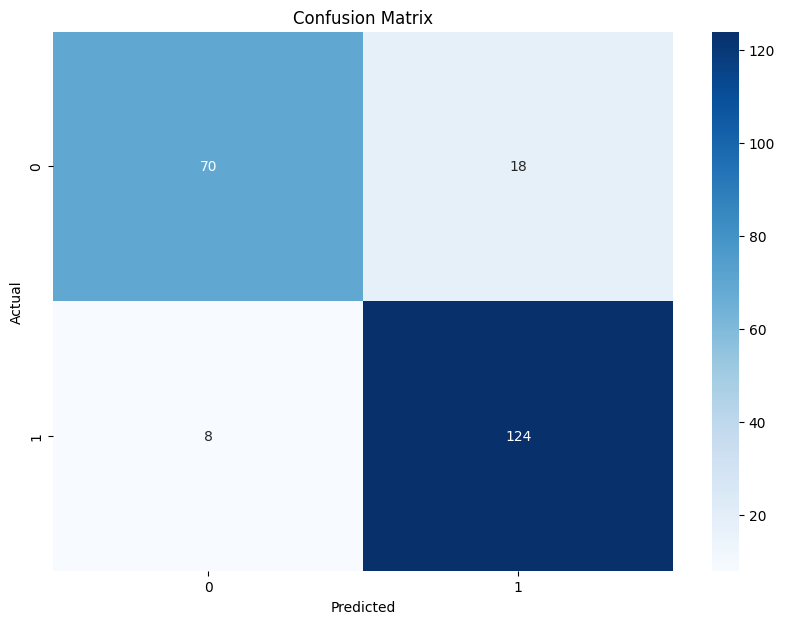

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## SVM


### Data Split

In [ ]:
X = data.drop(columns="depression")
y = data["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train, y_train)

svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

print(f'Training Accuracy: {accuracy_score(y_train, svm_y_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, svm_y_test_pred)}')

Training Accuracy: 0.9704545454545455
Test Accuracy: 0.8863636363636364


### Classification Report

In [ ]:
# Evaluate the model
print(classification_report(y_test, svm_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.83        88
           1       0.84      1.00      0.91       132

    accuracy                           0.89       220
   macro avg       0.92      0.86      0.87       220
weighted avg       0.90      0.89      0.88       220



### Visualization

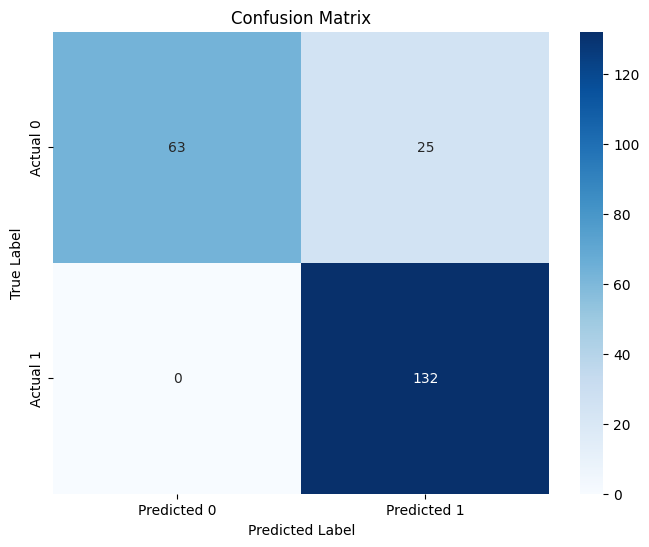

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

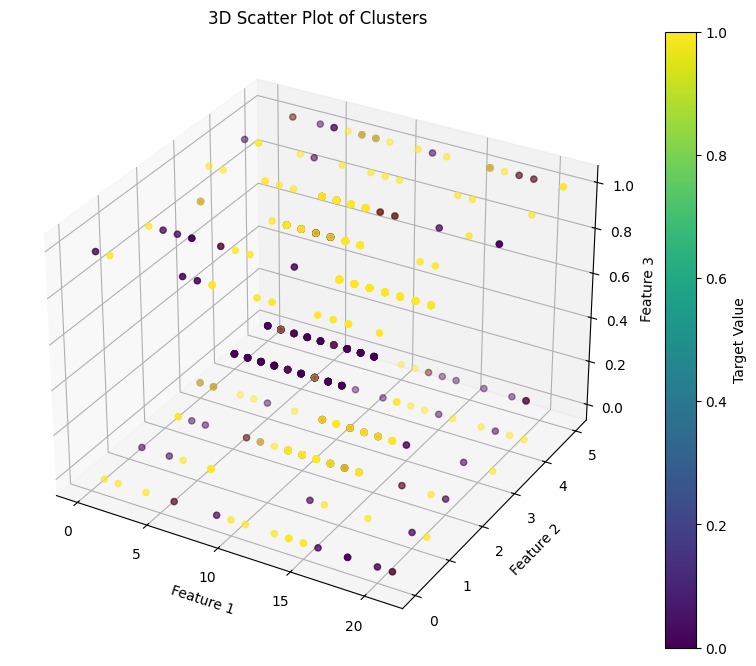

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['anxiety_level'], X['sleep_quality'], X['mental_health_history'], c=y, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Clusters')

plt.colorbar(scatter, label='Target Value')
plt.show()

# Undersampling

In [ ]:
raw_data = data.sample(frac=1.0, random_state=42)
raw_data

,anxiety_level,self_esteem,mental_health_history,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,depression
328,21,15,1,3,3,1,5,3,1,2,...,2,5,1,5,1,5,5,5,2,1
688,3,26,0,1,2,5,2,2,3,4,...,4,1,5,1,3,2,1,1,0,0
413,11,15,1,2,1,2,4,3,3,3,...,3,3,3,2,3,3,2,2,1,0
788,10,24,0,2,1,2,2,2,3,2,...,3,2,2,2,2,3,2,3,1,1
244,6,26,0,1,2,4,1,2,4,5,...,4,1,4,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,18,6,1,5,3,1,5,4,2,2,...,1,3,2,4,1,5,4,5,2,1
121,18,0,1,5,3,1,3,3,1,2,...,1,4,1,5,1,4,4,5,2,1
1044,15,1,1,3,3,1,4,3,2,1,...,1,4,2,5,1,5,4,5,2,1
1095,11,17,0,3,1,3,2,2,2,2,...,2,2,2,3,3,2,3,3,1,1


In [ ]:
index_slide = int(len(raw_data) * 0.8)

train_df = raw_data.iloc[:index_slide]
test_df = raw_data.iloc[index_slide:]

print("Train DF\n",train_df.depression.value_counts())
print("Test DF\n",test_df.depression.value_counts())
train_df

Train DF
 depression
1    549
0    331
Name: count, dtype: int64
Test DF
 depression
1    137
0     83
Name: count, dtype: int64


,anxiety_level,self_esteem,mental_health_history,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,depression
328,21,15,1,3,3,1,5,3,1,2,...,2,5,1,5,1,5,5,5,2,1
688,3,26,0,1,2,5,2,2,3,4,...,4,1,5,1,3,2,1,1,0,0
413,11,15,1,2,1,2,4,3,3,3,...,3,3,3,2,3,3,2,2,1,0
788,10,24,0,2,1,2,2,2,3,2,...,3,2,2,2,2,3,2,3,1,1
244,6,26,0,1,2,4,1,2,4,5,...,4,1,4,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,6,25,0,1,2,5,1,1,4,5,...,4,2,5,1,3,2,2,1,0,0
1046,10,19,1,3,1,3,4,2,3,3,...,3,2,3,2,3,2,2,2,1,1
914,9,21,0,2,1,2,4,3,3,2,...,2,3,2,2,3,2,3,2,1,1
52,6,29,0,1,2,4,2,1,4,4,...,5,2,5,1,3,2,2,1,0,0


In [ ]:
true_df = train_df[train_df.depression == 1]
false_df = train_df[train_df.depression == 0]
minority_len = len(false_df)
true_df = true_df.sample(n=minority_len, random_state=42)

len(false_df), len(true_df)

(331, 331)

In [ ]:
balance_train_df = pd.concat([true_df, false_df]).sample(frac=1.0, random_state=42)
balance_train_df

,anxiety_level,self_esteem,mental_health_history,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,depression
902,21,10,0,1,3,1,5,4,3,1,...,2,5,0,5,0,2,2,1,1,1
848,8,7,1,0,3,5,4,2,3,5,...,2,0,2,4,0,5,2,0,0,0
493,13,14,0,4,3,5,5,2,0,2,...,1,5,3,3,0,1,3,3,1,0
809,18,12,0,5,3,5,0,4,0,3,...,4,2,3,4,0,0,0,0,2,0
375,17,0,1,5,3,1,5,3,1,2,...,2,4,1,5,1,5,4,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,19,2,1,5,3,1,4,4,1,1,...,2,3,2,4,1,4,5,5,2,1
977,10,21,1,3,1,3,2,2,3,2,...,3,2,2,2,2,3,2,2,1,1
116,13,21,1,3,1,3,4,2,2,2,...,2,3,2,3,2,3,3,3,1,1
120,6,28,0,1,2,4,2,2,3,4,...,5,1,4,1,3,2,2,1,0,0


<Axes: xlabel='depression'>

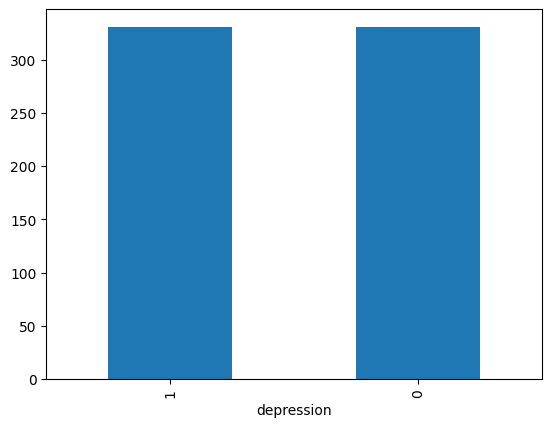

In [ ]:
balance_train_df.depression.value_counts().plot(kind='bar')

# Models

## Logistic Regression

### Data Split

In [ ]:
X = balance_train_df.drop(columns="depression")
y = balance_train_df["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

print(f"Train acc: {round(accuracy_score(y_train, lr_y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, lr_y_test_pred), 3)}")

Train acc: 0.894
Test acc: 0.85


### Classification Report

In [ ]:
# Evaluate the model
print(classification_report(y_test, lr_y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        67
           1       0.83      0.88      0.85        66

    accuracy                           0.85       133
   macro avg       0.85      0.85      0.85       133
weighted avg       0.85      0.85      0.85       133



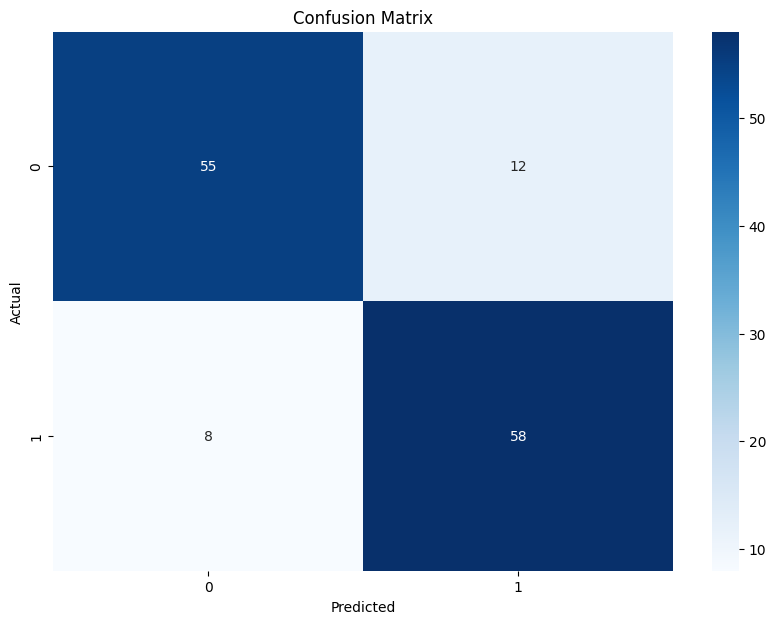

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

### Data Split

In [ ]:
X = balance_train_df.drop(columns="depression")
y = balance_train_df["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.8345864661654135


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8998109640831758
Test Accuracy: 0.8345864661654135


### Classification Report

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        67
           1       0.81      0.88      0.84        66

    accuracy                           0.83       133
   macro avg       0.84      0.83      0.83       133
weighted avg       0.84      0.83      0.83       133



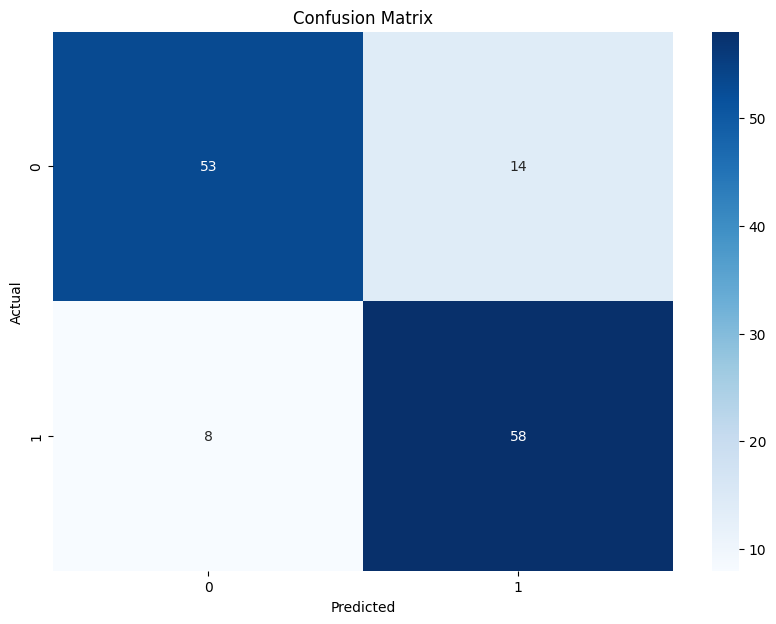

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## SVM


### Data Split

In [ ]:
X = balance_train_df.drop(columns="depression")
y = balance_train_df["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train, y_train)

svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

print(f'Training Accuracy: {accuracy_score(y_train, svm_y_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, svm_y_test_pred)}')

Training Accuracy: 0.9508506616257089
Test Accuracy: 0.8571428571428571


### Classification Report

In [ ]:
# Evaluate the model
print(classification_report(y_test, svm_y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        67
           1       0.85      0.86      0.86        66

    accuracy                           0.86       133
   macro avg       0.86      0.86      0.86       133
weighted avg       0.86      0.86      0.86       133



### Visualization

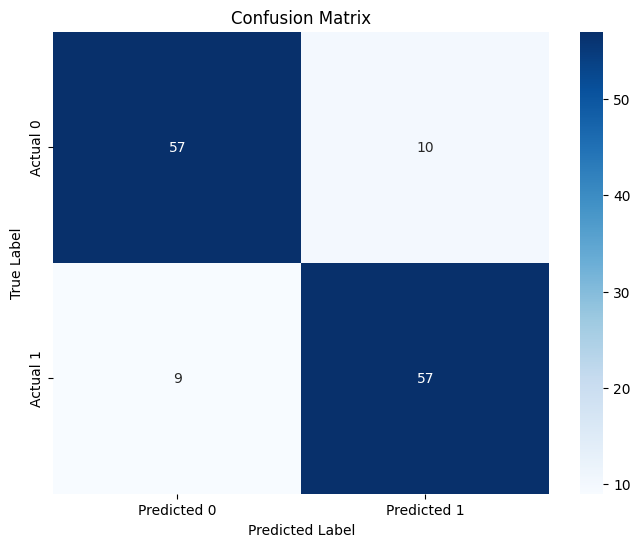

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Oversampling - SMOTE

In [ ]:
smote = SMOTE(random_state=42)
smote

SMOTE(random_state=42)

In [ ]:
index_slide = int(len(X) * 0.8)

train_df = data.iloc[:index_slide]
test_df = data.iloc[index_slide:]

print("Train DF\n",train_df.depression.value_counts())
print("Test DF\n",test_df.depression.value_counts())
train_df

Train DF
 depression
1    331
0    198
Name: count, dtype: int64
Test DF
 depression
1    355
0    216
Name: count, dtype: int64


,anxiety_level,self_esteem,mental_health_history,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,depression
0,14,20,0,2,1,2,4,2,3,3,...,3,2,3,3,2,3,3,2,1,1
1,15,8,1,5,3,1,4,3,1,2,...,1,4,1,5,1,4,5,5,2,1
2,12,18,1,2,1,2,2,2,2,3,...,2,3,3,2,2,3,2,2,1,1
3,16,12,1,4,3,1,3,4,2,2,...,2,4,1,4,1,4,4,5,2,1
4,16,28,0,2,3,5,1,3,2,4,...,4,3,1,2,1,5,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,10,18,1,2,1,3,2,3,2,3,...,3,3,2,3,3,3,3,2,1,0
525,13,15,1,2,1,2,2,2,3,3,...,2,2,2,3,2,2,2,3,1,1
526,7,29,0,1,2,4,1,1,3,4,...,5,1,5,1,3,2,1,1,0,0
527,16,15,1,5,3,1,3,3,1,2,...,1,4,1,5,1,5,5,5,2,1


In [ ]:
X = data.drop(columns="depression")
y = data["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

## Logistic Regression

### Data Split

In [ ]:
X = data.drop(columns="depression")
y = data["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE to training data.
X_train, y_train = smote.fit_resample(X_train, y_train)

### Modeling

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

### Classification Report

In [ ]:
# Evaluate accuracies.
print(f"Train Acc: {round(accuracy_score(y_train, lr_y_train_pred), 3)}")
print(f"Test Acc: {round(accuracy_score(y_test, lr_y_test_pred), 3)}\n")

# Evaluate the model
print("Train Report:")
print(classification_report(y_train, lr_y_train_pred))
print("Test Report:")
print(classification_report(y_test, lr_y_test_pred))

Train Acc: 0.898
Test Acc: 0.832

Train Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       554
           1       0.87      0.94      0.90       554

    accuracy                           0.90      1108
   macro avg       0.90      0.90      0.90      1108
weighted avg       0.90      0.90      0.90      1108

Test Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        88
           1       0.85      0.88      0.86       132

    accuracy                           0.83       220
   macro avg       0.83      0.82      0.82       220
weighted avg       0.83      0.83      0.83       220



In [ ]:
# Evaluate accuracies.
print(f"Train Acc: {round(accuracy_score(y_train, lr_y_train_pred), 3)}")
print(f"Test Acc: {round(accuracy_score(y_test, lr_y_test_pred), 3)}\n")

# Evaluate the model
print("Test Report:")
print(classification_report(y_test, lr_y_test_pred))

Train Acc: 0.898
Test Acc: 0.832

Test Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        88
           1       0.85      0.88      0.86       132

    accuracy                           0.83       220
   macro avg       0.83      0.82      0.82       220
weighted avg       0.83      0.83      0.83       220



### Visualization

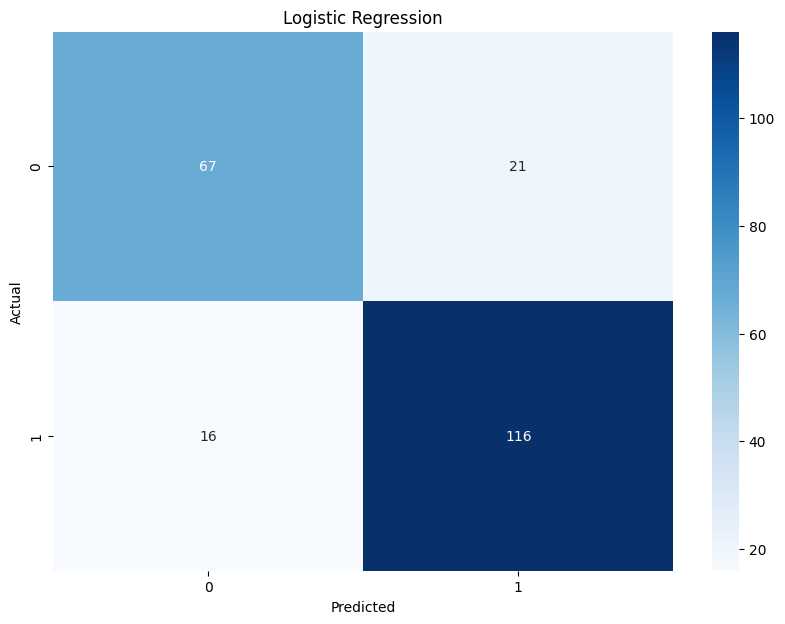

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, lr_y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.show()

## Decision Tree

### Data Split

In [ ]:
X = data.drop(columns="depression")
y = data["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Modeling

In [ ]:
# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.8272727272727273


In [ ]:
# Decision trees overfit
# AND overfitting is more likely with a small training data set
# so we're jumping right into hyper parameter tuning
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

### Classification Report

In [ ]:
# Evaluate accuracies.
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}\n")

# Evaluate the model
print("Train Report:")
print(classification_report(y_train, y_pred_train))
print("Test Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9169675090252708
Test Accuracy: 0.8590909090909091

Train Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       554
           1       0.90      0.94      0.92       554

    accuracy                           0.92      1108
   macro avg       0.92      0.92      0.92      1108
weighted avg       0.92      0.92      0.92      1108

Test Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        88
           1       0.87      0.90      0.88       132

    accuracy                           0.86       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.86      0.86       220



In [ ]:
# Evaluate accuracies.
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}\n")

# Evaluate the model
print("Test Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9169675090252708
Test Accuracy: 0.8590909090909091

Test Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        88
           1       0.87      0.90      0.88       132

    accuracy                           0.86       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.86      0.86       220



### Visualization

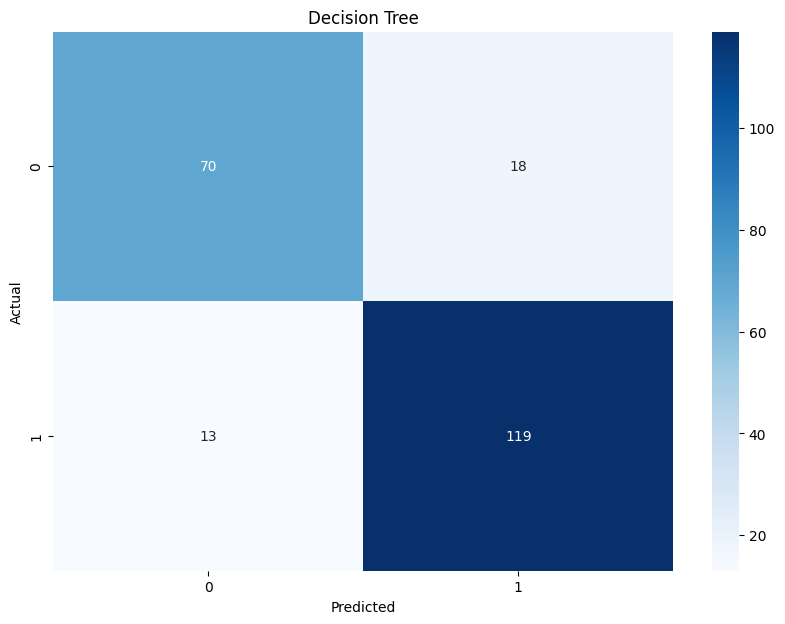

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree')
plt.show()

## SVM


### Data Split

In [ ]:
X = data.drop(columns="depression")
y = data["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Modeling

In [ ]:
svm_model = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_model.fit(X_train, y_train)

svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, svm_y_train_pred)
test_accuracy = accuracy_score(y_test, svm_y_test_pred)

### Classification Report

In [ ]:
# Evaluate accuracies.
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}\n")

# Evaluate the model
print("Train Report:")
print(classification_report(y_train, svm_y_train_pred))
print("Test Report:")
print(classification_report(y_test, svm_y_test_pred))

Training Accuracy: 0.881198347107438
Test Accuracy: 0.8848484848484849

Train Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       484
           1       0.82      0.98      0.89       484

    accuracy                           0.88       968
   macro avg       0.90      0.88      0.88       968
weighted avg       0.90      0.88      0.88       968

Test Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       128
           1       0.86      0.98      0.91       202

    accuracy                           0.88       330
   macro avg       0.90      0.86      0.87       330
weighted avg       0.89      0.88      0.88       330



In [ ]:
# Evaluate accuracies.
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}\n")

# Evaluate the model
print("Test Report:")
print(classification_report(y_test, svm_y_test_pred))

Training Accuracy: 0.9018595041322314
Test Accuracy: 0.8666666666666667

Test Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       128
           1       0.85      0.95      0.90       202

    accuracy                           0.87       330
   macro avg       0.87      0.84      0.85       330
weighted avg       0.87      0.87      0.86       330



### Visualization

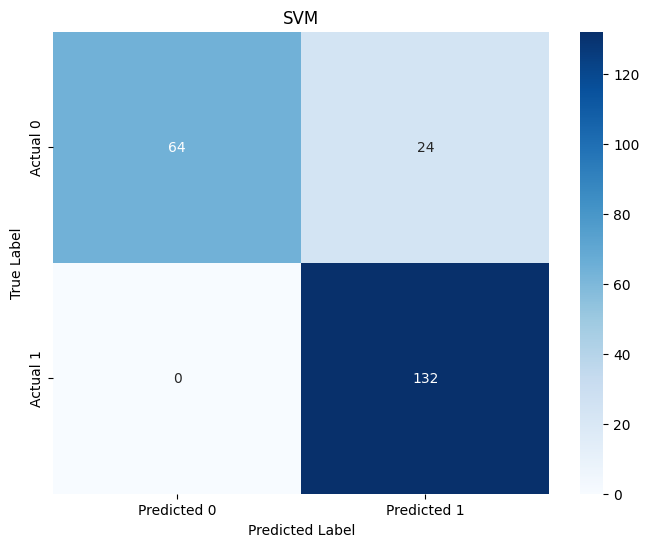

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM')
plt.show()

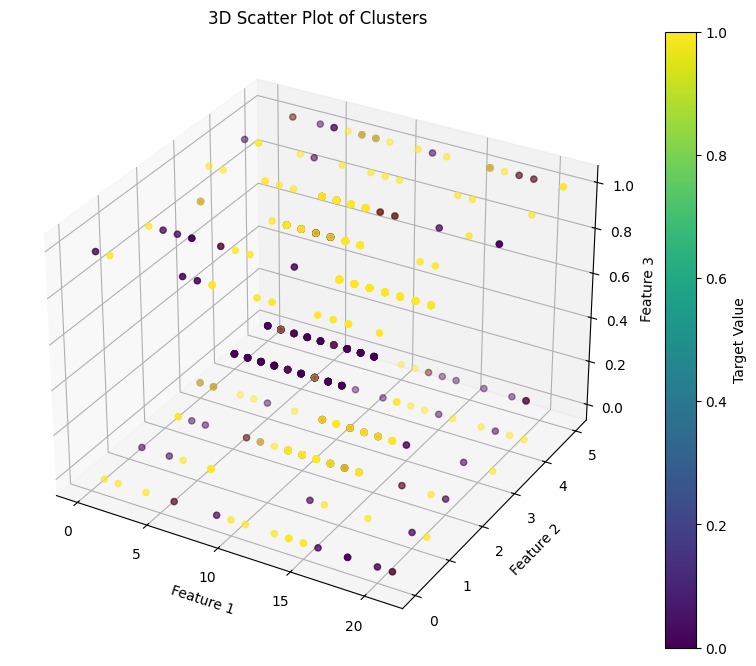

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['anxiety_level'], X['sleep_quality'], X['mental_health_history'], c=y, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Clusters')

plt.colorbar(scatter, label='Target Value')
plt.show()

In [ ]:
# Oversample the above
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
len(X_train), len(y_train)

(1108, 1108)